Test case with nexp = 1000:
Mean Expected:       5.0
Mean Simulated:      4.973
Var Expected:        2.5
Var Simulated:       2.4862710000000003

Test case with nexp = 100000:
Mean Expected:       5.0
Mean Simulated:      4.99542
Var Expected:        2.5
Var Simulated:       2.4905590236000004

 Plot 8.1 Data:
Mean Expected:       2.5
Mean Simulated:      2.471
Var Expected:        1.875
Var Simulated:       1.8251590000000002

 Plot 8.2

Counts:   [ 59 192 271 265 145  50  14   4   0   0   0]
Total:      1000
Bin Edges:  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]

 Plot 8.3 Data:
Mean Expected:       7.5
Mean Simulated:      7.564
Var Expected:        1.875
Var Simulated:       1.7199040000000003

 Plot 8.4 Data:
Mean Expected:       5.2
Mean Simulated:      5.215
Var Expected:        2.496
Var Simulated:       2.5567749999999996

Increasing # of Trials gets the models and data to match

 Plot 8.5 Data:
Mean Expected:       100.0
Mean Simulated:      100.0714
Var Expected:     

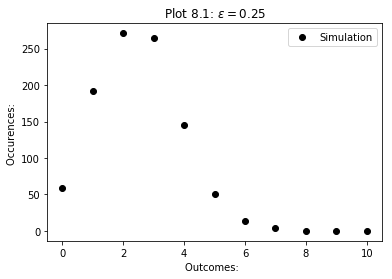

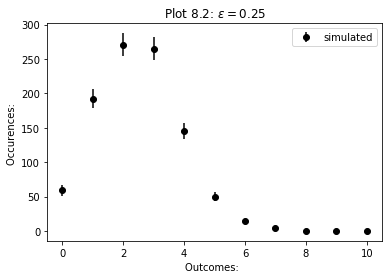

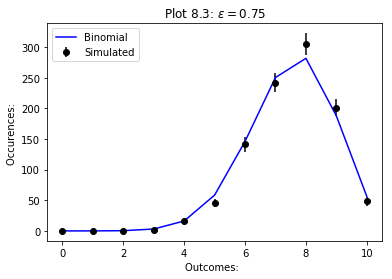

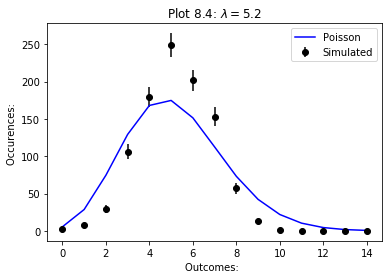

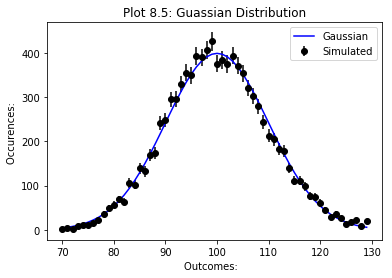

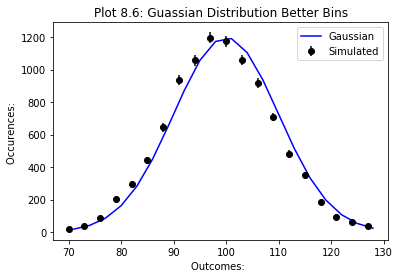

In [60]:
# Diego Pantoja Sharon Wamerdam

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm


# BINOMIAL FUNCTION
def throw_binomial(nexp,ntry,eps):
    x = np.random.uniform(size=(nexp,ntry))
    
    # column = experiment
    # Trial # = row
    x = np.random.uniform(size=(nexp,ntry))
    # print(x)
    keep = ( x <= eps)
    y = keep.astype(int) # Converts True/False values in array to 0 and 1

    #print(keep)
    #print(y)

    success = np.zeros(nexp) # Counts # of success


    
    for i in range(0,nexp):
        sum = np.sum(y[i]) 
        success[i] = sum
        # print(success[i])
        
    print('Mean Expected:      ', ntry * eps)
    print('Mean Simulated:     ', np.mean(success))
    print('Var Expected:       ', ntry * eps * (1-eps))
    print('Var Simulated:      ', np.var(success))
    
    return success
# BINOMIAL FUNCTION



print('Test case with nexp = 1000:')
eps = 0.5
nexp = 1000
ntry = 10

y1 = throw_binomial(nexp,ntry,eps)

print('\nTest case with nexp = 100000:')
eps1 = 0.5
nexp1 = 100000
ntry1 = 10

y2 = throw_binomial(nexp1,ntry1,eps1)

#PLOT 8.1
print('\n Plot 8.1 Data:')

#Variables
eps2 = 0.25
nexp2 = 1000
ntry = 10

#Function Call
m = throw_binomial(nexp2,ntry1,eps2)

#Histogram plotting + data
counts,edges = np.histogram(m,bins=11,range=(0,11))
print('\n Plot 8.2')
print('\nCounts:  ',counts)
print('Total:     ',np.sum(counts))
print('Bin Edges: ',edges)
plt.figure()
plt.plot(edges[:-1],counts,'ko',label = 'Simulation')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.1: $\\epsilon=0.25$')
plt.legend()


# PLOT 8.2
plt.figure()
errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko', label = 'simulated')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.2: $\\epsilon=0.25$')
plt.legend()



#PLOT 8.3


#Variables
eps3 = 0.75
nexp3 = 1000
ntry3 = 10


print('\n Plot 8.3 Data:')
m3 = throw_binomial(nexp3,ntry3,eps3)


plt.figure()
counts,edges = np.histogram(m3,bins=11,range=(0,11))
errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko',label = 'Simulated')
xpredict = edges[:-1]
ypredict = nexp3 * binom.pmf(xpredict,ntry3,eps3)
plt.plot(xpredict,ypredict,'b-',label = 'Binomial')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.3: $\\epsilon=0.75$')
plt.legend()


# Plot 8.4

# Simulation Data

lamb = 5.2
nexp4 = 1000
ntry4 = 10
eps4 = lamb / ntry4


print('\n Plot 8.4 Data:')
m4 = throw_binomial(nexp4,ntry4,eps4)
counts,edges = np.histogram(m4,bins=15,range=(0,15))

plt.figure()
errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko',label = 'Simulated')
xpred4 = edges[:-1]
ypred4 = nexp4 * poisson.pmf(xpred4, lamb)
plt.plot(xpred4,ypred4,'b-',label = 'Poisson')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.4: $\\lambda=5.2$')
plt.legend()
print('\nIncreasing # of Trials gets the models and data to match')


# Plot 8.5

# SIMULATION CODE

eps5 = 0.01
nexp5 = 10000
ntry5 = 10000




# Parameters
mean5 = 100
var5 = 100
std_dev5 = pow(var5,0.5)

# PLOT 
plt.figure()
print('\n Plot 8.5 Data:')
m5 = throw_binomial(nexp5,ntry5,eps5)



counts,edges = np.histogram(m5,bins=60,range=(70,130))
xpred5 = edges[:-1]
ypred5 = (nexp5) * norm.pdf(xpred5, loc=mean5, scale=std_dev5)


errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko',label = 'Simulated')
plt.plot(xpred5,ypred5,'b-',label = 'Gaussian')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.5: Guassian Distribution')
plt.legend()


# Plot 8.6

# SIMULATION CODE

eps6 = 0.01
nexp6 = 10000
ntry6 = 10000




# Parameters
mean6 = 100
var6 = 100
std_dev6 = pow(var6,0.5)

# PLOT 
plt.figure()
print('\n Plot 8.6 Data:')
m6 = throw_binomial(nexp6,ntry6,eps6)
counts,edges = np.histogram(m6,bins=20,range=(70,130))
xpred6 = (edges[:-1] + edges[1:] -1 )/2
ypred6 = (nexp6*3) * norm.pdf(xpred6, loc=mean6, scale=std_dev6)


errs = counts ** 0.50
plt.errorbar(edges[:-1],counts,yerr=errs,fmt='ko',label = 'Simulated')
plt.plot(xpred6,ypred6,'b-',label = 'Gaussian')
plt.xlabel("Outcomes:  ")
plt.ylabel("Occurences: ")
plt.title('Plot 8.6: Guassian Distribution Better Bins')
plt.legend()
